1. Data Processing

In [149]:
# Dependencies
import numpy as np
import pandas as pd 
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [150]:
# Reading the data from a csv to a pandas dataframe
df = pd.read_csv("nflcombine2.csv")

In [151]:
df.head()

,Unnamed: 0,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,...,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year,Winner
0,0,W,Tampa Bay Buccaneers,31.0,17.0,17.0,256.0,158.0,98.0,2.0,...,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,San Francisco 49ers,2019,San Francisco 49ers
1,1,W,Cincinnati Bengals,41.0,17.0,27.0,571.0,312.0,259.0,1.0,...,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,San Francisco 49ers,2019,San Francisco 49ers
2,2,W,Pittsburgh Steelers,24.0,20.0,26.0,436.0,268.0,168.0,5.0,...,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,San Francisco 49ers,2019,San Francisco 49ers
3,3,W,Los Angeles Rams,20.0,7.0,22.0,331.0,232.0,99.0,2.0,...,157.0,48.0,109.0,1.0,-3.54,25.23,-5.01,San Francisco 49ers,2019,San Francisco 49ers
4,4,W,Washington Redskins,9.0,0.0,17.0,283.0,146.0,137.0,1.0,...,154.0,50.0,104.0,1.0,-1.99,14.12,-0.61,San Francisco 49ers,2019,San Francisco 49ers


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  895 non-null    int64  
 1   Unnamed: 5  895 non-null    object 
 2   Opp         895 non-null    object 
 3   Tm          895 non-null    float64
 4   Opp.1       895 non-null    float64
 5   1stD        895 non-null    float64
 6   TotYd       895 non-null    float64
 7   PassY       895 non-null    float64
 8   RushY       895 non-null    float64
 9   TO          895 non-null    float64
 10  1stD.1      895 non-null    float64
 11  TotYd.1     895 non-null    float64
 12  PassY.1     895 non-null    float64
 13  RushY.1     895 non-null    float64
 14  TO.1        895 non-null    float64
 15  Offense     895 non-null    float64
 16  Defense     895 non-null    float64
 17  Sp. Tms     895 non-null    float64
 18  Home_team   895 non-null    object 
 19  Year        895 non-null    i

In [153]:
df.isnull().sum()

Unnamed: 0    0
Unnamed: 5    0
Opp           0
Tm            0
Opp.1         0
1stD          0
TotYd         0
PassY         0
RushY         0
TO            0
1stD.1        0
TotYd.1       0
PassY.1       0
RushY.1       0
TO.1          0
Offense       0
Defense       0
Sp. Tms       0
Home_team     0
Year          0
Winner        0
dtype: int64

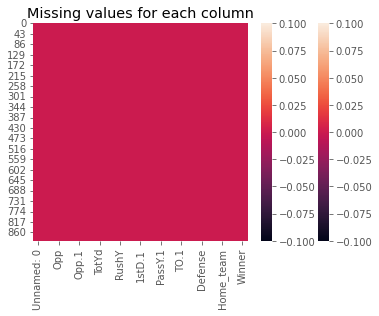

In [154]:
#a. Plot a heatmap of the missing values in the dataset
# Visualize missing values using heatmap
sns.heatmap(df.isnull())
plt.title("Missing values for each column")
sns.heatmap(df.isnull())
plt.show()

In [155]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_df

,Unnamed: 0,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Year
0,0,31.0,17.0,17.0,256.0,158.0,98.0,2.0,21.0,295.0,174.0,121.0,4.0,-7.51,19.12,1.10,2019
1,1,41.0,17.0,27.0,571.0,312.0,259.0,1.0,14.0,316.0,291.0,25.0,1.0,27.34,1.14,-6.64,2019
2,2,24.0,20.0,26.0,436.0,268.0,168.0,5.0,11.0,239.0,160.0,79.0,2.0,-3.72,10.20,0.12,2019
3,3,20.0,7.0,22.0,331.0,232.0,99.0,2.0,10.0,157.0,48.0,109.0,1.0,-3.54,25.23,-5.01,2019
4,4,9.0,0.0,17.0,283.0,146.0,137.0,1.0,10.0,154.0,50.0,104.0,1.0,-1.99,14.12,-0.61,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,890,24.0,22.0,19.0,361.0,252.0,109.0,1.0,24.0,396.0,300.0,96.0,1.0,9.10,-9.09,4.28,2022
891,891,7.0,24.0,20.0,264.0,202.0,62.0,3.0,25.0,486.0,323.0,163.0,1.0,-7.86,-14.26,7.37,2022
892,892,28.0,24.0,30.0,373.0,250.0,123.0,1.0,23.0,416.0,277.0,139.0,1.0,11.58,-8.25,1.93,2022
893,893,28.0,25.0,23.0,344.0,263.0,81.0,1.0,19.0,338.0,227.0,111.0,2.0,6.41,-7.36,2.69,2022


In [156]:
categorical_df = df.select_dtypes(include='object')
categorical_df

,Unnamed: 5,Opp,Home_team,Winner
0,W,Tampa Bay Buccaneers,San Francisco 49ers,San Francisco 49ers
1,W,Cincinnati Bengals,San Francisco 49ers,San Francisco 49ers
2,W,Pittsburgh Steelers,San Francisco 49ers,San Francisco 49ers
3,W,Los Angeles Rams,San Francisco 49ers,San Francisco 49ers
4,W,Washington Redskins,San Francisco 49ers,San Francisco 49ers
...,...,...,...,...
890,W,Las Vegas Raiders,Tennessee Titans,Tennessee Titans
891,L,Philadelphia Eagles,Minnesota Vikings,Philadelphia Eagles
892,W,Detroit Lions,Minnesota Vikings,Minnesota Vikings
893,W,New Orleans Saints,Minnesota Vikings,Minnesota Vikings


In [157]:
#b. Find the number of outliers in each numeric column and remove them
for (columnName, columnData) in numeric_df.iteritems():
   avg = columnData.mean()
   std_dev = columnData.std()
   print('Column Name : ', columnName)
   print('Number of NUll values : ', columnData.isnull().sum())
   print('Number of Outliers : ',((columnData < (avg - 2 * std_dev)) |(columnData > (avg + 2 * std_dev))).sum())
   print("-----------------------------")

Column Name :  Unnamed: 0
Number of NUll values :  0
Number of Outliers :  0
-----------------------------
Column Name :  Tm
Number of NUll values :  0
Number of Outliers :  54
-----------------------------
Column Name :  Opp.1
Number of NUll values :  0
Number of Outliers :  55
-----------------------------
Column Name :  1stD
Number of NUll values :  0
Number of Outliers :  43
-----------------------------
Column Name :  TotYd
Number of NUll values :  0
Number of Outliers :  41
-----------------------------
Column Name :  PassY
Number of NUll values :  0
Number of Outliers :  47
-----------------------------
Column Name :  RushY
Number of NUll values :  0
Number of Outliers :  41
-----------------------------
Column Name :  TO
Number of NUll values :  0
Number of Outliers :  66
-----------------------------
Column Name :  1stD.1
Number of NUll values :  0
Number of Outliers :  44
-----------------------------
Column Name :  TotYd.1
Number of NUll values :  0
Number of Outliers :  41


In [158]:
# Removing outliers
avg = numeric_df.mean()
std_dev = numeric_df.std()
outlier_df = ((numeric_df < (avg - 2 * std_dev)) |(numeric_df > (avg + 2 * std_dev)))
outlier_df

,Unnamed: 0,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Year
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,True,True,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
891,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
892,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [159]:
final_df = pd.concat([categorical_df, outlier_df], axis=1)
outliers_in_rows = []
for index,row in outlier_df.iterrows():
   outliers_in_rows.append(row.sum())

print(len(outliers_in_rows))

895


In [160]:
#creating new column with the name value
final_df['value'] = outliers_in_rows
final_df_without_outliers= final_df.loc[final_df['value'] == 0]
print(final_df_without_outliers.shape)

(495, 22)


In [161]:
final_df.head()

,Unnamed: 5,Opp,Home_team,Winner,Unnamed: 0,Tm,Opp.1,1stD,TotYd,PassY,...,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Year,value
0,W,Tampa Bay Buccaneers,San Francisco 49ers,San Francisco 49ers,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,1
1,W,Cincinnati Bengals,San Francisco 49ers,San Francisco 49ers,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,3
2,W,Pittsburgh Steelers,San Francisco 49ers,San Francisco 49ers,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
3,W,Los Angeles Rams,San Francisco 49ers,San Francisco 49ers,False,False,False,False,False,False,...,True,True,True,False,False,False,True,False,False,4
4,W,Washington Redskins,San Francisco 49ers,San Francisco 49ers,False,False,True,False,False,False,...,True,True,True,False,False,False,False,False,False,4


In [162]:
final_df_without_outliers.head()

,Unnamed: 5,Opp,Home_team,Winner,Unnamed: 0,Tm,Opp.1,1stD,TotYd,PassY,...,1stD.1,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Year,value
8,L,Baltimore Ravens,San Francisco 49ers,Baltimore Ravens,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
10,L,Atlanta Falcons,San Francisco 49ers,Atlanta Falcons,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
11,W,Los Angeles Rams,San Francisco 49ers,San Francisco 49ers,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
13,L,Kansas City Chiefs,San Francisco 49ers,Kansas City Chiefs,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0
15,L,Oakland Raiders,Chicago Bears,Oakland Raiders,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,0


In [163]:
final_df_outliers = final_df.loc[final_df['value'] != 0]
arr = []
for i,r in final_df_outliers.iterrows():
   arr.append(i)
df_without_outliers = df.drop(df.index[arr])

In [164]:
#Head of the data after removal of outliers
df_without_outliers.head()

,Unnamed: 0,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,...,TotYd.1,PassY.1,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year,Winner
8,8,L,Baltimore Ravens,17.0,20.0,15.0,331.0,157.0,174.0,1.0,...,283.0,105.0,178.0,1.0,6.20,-6.40,-1.20,San Francisco 49ers,2019,Baltimore Ravens
10,10,L,Atlanta Falcons,22.0,29.0,20.0,313.0,193.0,120.0,2.0,...,290.0,201.0,89.0,1.0,2.84,-7.04,-2.73,San Francisco 49ers,2019,Atlanta Falcons
11,11,W,Los Angeles Rams,34.0,31.0,19.0,334.0,215.0,119.0,2.0,...,395.0,323.0,72.0,1.0,3.67,-3.16,1.84,San Francisco 49ers,2019,San Francisco 49ers
13,13,L,Kansas City Chiefs,20.0,31.0,21.0,351.0,210.0,141.0,2.0,...,397.0,268.0,129.0,2.0,5.19,-18.54,1.58,San Francisco 49ers,2019,Kansas City Chiefs
15,15,L,Oakland Raiders,21.0,24.0,15.0,236.0,194.0,42.0,2.0,...,398.0,229.0,169.0,2.0,-3.03,-2.24,-0.43,Chicago Bears,2019,Oakland Raiders


In [165]:
#Missing Values
total_missing_values = df_without_outliers.isnull().sum()
missing_values_per_column = df_without_outliers.isnull().sum()/df_without_outliers.isnull().count()
null_values = pd.concat([total_missing_values, missing_values_per_column], axis=1, keys=['total_null', 'total_null_perc'])
null_values = null_values.sort_values('total_null', ascending=False)
print(null_values)

            total_null  total_null_perc
Unnamed: 0           0              0.0
TotYd.1              0              0.0
Year                 0              0.0
Home_team            0              0.0
Sp. Tms              0              0.0
Defense              0              0.0
Offense              0              0.0
TO.1                 0              0.0
RushY.1              0              0.0
PassY.1              0              0.0
1stD.1               0              0.0
Unnamed: 5           0              0.0
TO                   0              0.0
RushY                0              0.0
PassY                0              0.0
TotYd                0              0.0
1stD                 0              0.0
Opp.1                0              0.0
Tm                   0              0.0
Opp                  0              0.0
Winner               0              0.0


In [166]:
NA_val = df_without_outliers.isna().sum();
def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_without_outliers.shape[0] < threshold:
            col_pass.append(i)
    return col_pass
df_cleaned = df_without_outliers[na_filter(NA_val)]
print(df_cleaned.columns)

Index(['Unnamed: 0', 'Unnamed: 5', 'Opp', 'Tm', 'Opp.1', '1stD', 'TotYd',
       'PassY', 'RushY', 'TO', '1stD.1', 'TotYd.1', 'PassY.1', 'RushY.1',
       'TO.1', 'Offense', 'Defense', 'Sp. Tms', 'Home_team', 'Year', 'Winner'],
      dtype='object')


In [167]:
print(len(df_without_outliers.columns),len(df_cleaned.columns))

21 21


In [168]:
# check for duplicate entries
duplicate = df_cleaned.duplicated();
print(duplicate.sum());

# remove duplicates
df_cleaned.drop_duplicates(inplace=True);
dp1=df_cleaned.duplicated();
print(dp1.sum());

0
0


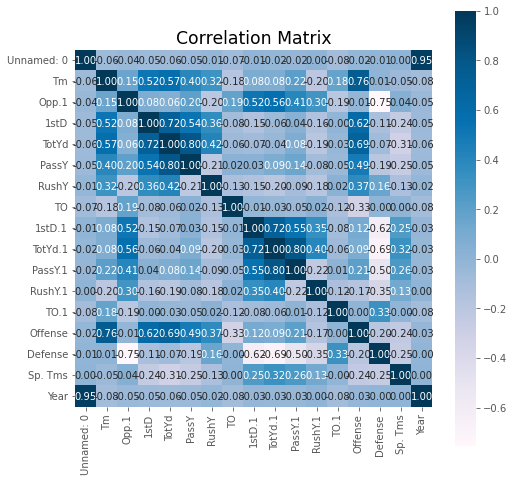

In [169]:
#c. Plot a correlation matrix
dataCorr = df_cleaned.corr()
plt.figure(figsize=(8,8))
plt.title('Correlation Matrix', fontsize="xx-large")
sns.heatmap(dataCorr, annot=True, fmt='.2f', square=True, cmap = 'PuBu')
plt.show()

In [170]:
print(df_cleaned.shape)
df_cleaned.mean()

(495, 21)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Unnamed: 0     465.365657
Tm              22.844444
Opp.1           22.551515
1stD            20.553535
TotYd          346.870707
PassY          234.050505
RushY          112.820202
TO               1.581818
1stD.1          20.509091
TotYd.1        344.125253
PassY.1        231.925253
RushY.1        112.200000
TO.1             1.581818
Offense          3.595859
Defense         -3.268848
Sp. Tms         -0.013192
Year          2020.236364
dtype: float64

In [171]:
df_cleaned.var()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Unnamed: 0    65086.046187
Tm               61.504094
Opp.1            62.000883
1stD             16.000671
TotYd          4784.169484
PassY          4137.809185
RushY          1823.317810
TO                0.502908
1stD.1           16.258520
TotYd.1        4738.251487
PassY.1        4165.368895
RushY.1        1776.018623
TO.1              0.502908
Offense          82.232641
Defense          82.600311
Sp. Tms          16.761097
Year              0.950092
dtype: float64

In [172]:
#d. Normalize the following columns - Offense, Defense
from sklearn.preprocessing import MinMaxScaler
col = ['Offense', 'Defense']
data = df_cleaned[col]
s = data.values.astype(float)
min_max_scaler = MinMaxScaler(feature_range=(0,1))
s_scaled = min_max_scaler.fit_transform(s)
df_normalized = pd.DataFrame(s_scaled, columns=col,index=df_cleaned.index)
df_normalized = df_normalized.rename(columns={'Offense':'n_Offense', 'Defense':'n_Defense'})
df_cleaned = pd.concat([df_cleaned, df_normalized],axis=1)
df_cleaned

,Unnamed: 0,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,...,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year,Winner,n_Offense,n_Defense
8,8,L,Baltimore Ravens,17.0,20.0,15.0,331.0,157.0,174.0,1.0,...,178.0,1.0,6.20,-6.40,-1.20,San Francisco 49ers,2019,Baltimore Ravens,0.578947,0.405252
10,10,L,Atlanta Falcons,22.0,29.0,20.0,313.0,193.0,120.0,2.0,...,89.0,1.0,2.84,-7.04,-2.73,San Francisco 49ers,2019,Atlanta Falcons,0.503374,0.391247
11,11,W,Los Angeles Rams,34.0,31.0,19.0,334.0,215.0,119.0,2.0,...,72.0,1.0,3.67,-3.16,1.84,San Francisco 49ers,2019,San Francisco 49ers,0.522042,0.476149
13,13,L,Kansas City Chiefs,20.0,31.0,21.0,351.0,210.0,141.0,2.0,...,129.0,2.0,5.19,-18.54,1.58,San Francisco 49ers,2019,Kansas City Chiefs,0.556230,0.139606
15,15,L,Oakland Raiders,21.0,24.0,15.0,236.0,194.0,42.0,2.0,...,169.0,2.0,-3.03,-2.24,-0.43,Chicago Bears,2019,Oakland Raiders,0.371345,0.496280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,890,W,Las Vegas Raiders,24.0,22.0,19.0,361.0,252.0,109.0,1.0,...,96.0,1.0,9.10,-9.09,4.28,Tennessee Titans,2022,Tennessee Titans,0.644175,0.346389
891,891,L,Philadelphia Eagles,7.0,24.0,20.0,264.0,202.0,62.0,3.0,...,163.0,1.0,-7.86,-14.26,7.37,Minnesota Vikings,2022,Philadelphia Eagles,0.262708,0.233260
892,892,W,Detroit Lions,28.0,24.0,30.0,373.0,250.0,123.0,1.0,...,139.0,1.0,11.58,-8.25,1.93,Minnesota Vikings,2022,Minnesota Vikings,0.699955,0.364770
893,893,W,New Orleans Saints,28.0,25.0,23.0,344.0,263.0,81.0,1.0,...,111.0,2.0,6.41,-7.36,2.69,Minnesota Vikings,2022,Minnesota Vikings,0.583671,0.384245


Offense


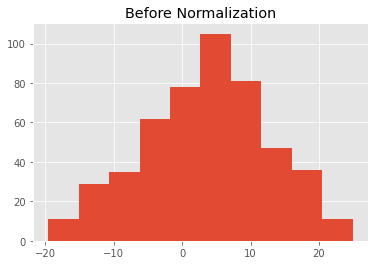

Defense


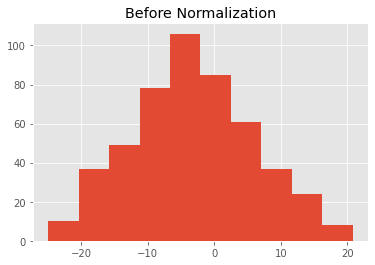

In [173]:
data = df_cleaned[['Offense','Defense']]
for i in data:
    print(i)
    plt.hist(df_cleaned[i])
    plt.title('Before Normalization')
    plt.show()

n_Offense


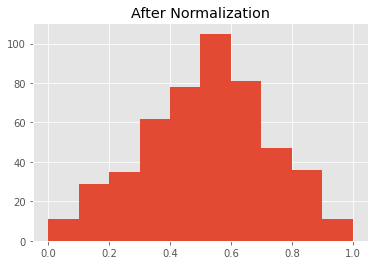

n_Defense


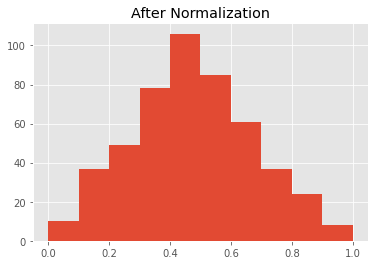

In [174]:
data = df_cleaned[['n_Offense', 'n_Defense']]
for i in data:
    print(i)
    plt.hist(df_normalized[i])
    plt.title('After Normalization')
    plt.show()

In [175]:
print('Mean:')
print(df_normalized.mean().round(decimals=1))
print('--------------------------')
print('Median:')
print(df_normalized.median().round(decimals=1))
print('--------------------------')
print('Variance:')
print(df_normalized.var().round(decimals=1))
print('--------------------------')

Mean:
n_Offense    0.5
n_Defense    0.5
dtype: float64
--------------------------
Median:
n_Offense    0.5
n_Defense    0.5
dtype: float64
--------------------------
Variance:
n_Offense    0.0
n_Defense    0.0
dtype: float64
--------------------------


2. Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


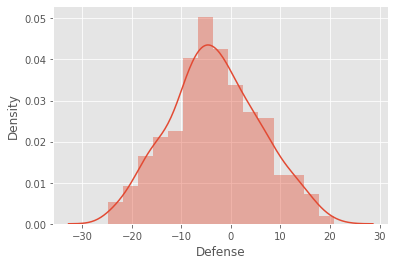

In [176]:
#a. Plot a distplot of ‘Defense’
sns.distplot(df_cleaned['Defense'])

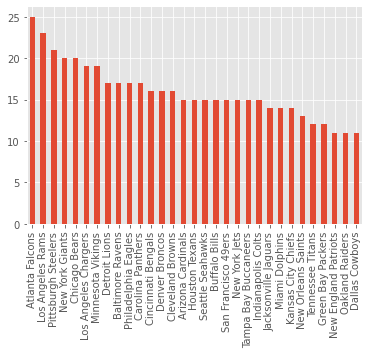

In [177]:
#b. Plot a barplot of ‘Home_team’ frequency
df_cleaned['Home_team'].value_counts().plot(kind='bar')

3. Hypothesis testing

In [178]:
# Dependencies

%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

#a. Use df['1stD'] as population and a sample of 'Home_team' == ‘New York Jets’ and test whether the average number of times the New York Jets first downs differ from the population using the one-sample t-test method

population = df_cleaned['1stD'].values
sample = df_cleaned[df_cleaned['Home_team'] == 'New York Jets']['1stD'].values
print(population.mean())
print(sample.mean())


#Let's conduct a t-test at a 95% confidence level and see if it correctly rejects the null hypothesis that the average number of times the New York Jets first downs are the same as that of the population. To conduct a one sample t-test, we can the stats.ttest_1samp() function:
stats.ttest_1samp(a = sample,               # Sample data
                 popmean = population.mean())  # Pop mean


20.553535353535352
18.8


Ttest_1sampResult(statistic=-2.1001660576757275, pvalue=0.05431645639253857)

In [179]:
#The test result shows the test statistic "t" is equal to -2.1001. This test statistic tells us how much the sample mean deviates from the null hypothesis. If the t-statistic lies outside the quantiles of the t-distribution corresponding to our confidence level and degrees of freedom, we reject the null hypothesis. We can check the quantiles with stats.t.ppf():
stats.t.ppf(q=0.025,  # Quantile to check
            df=10)  # Degrees of freedom

-2.2281388519649385

In [180]:
stats.t.ppf(q=0.975,  # Quantile to check
            df=10)  # Degrees of freedom
            

2.2281388519649385

In [181]:
#We can calculate the chances of seeing a result as extreme as the one we observed (known as the p-value) by passing the t-statistic in as the quantile to the stats.t.cdf() function :
stats.t.cdf(x= -2.1001,      # T-test statistic
               df= 10) * 2   # Multiply by two for two tailed test *

0.06206681108996698

In [182]:
#Note: The alternative hypothesis we are checking is whether the average number of times the New York Jets first downs differ from the population. Since the sample could differ in either the positive or negative direction we multiply the by two.
sigma = sample.std()/math.sqrt(11)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 10,                     # Degrees of freedom
                 loc = sample.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate
#The p-value 0.06206 is greater than our significance level α (equal to 1-conf.level or 0.05) so we should not reject the null hypothesis


(16.701201149187646, 20.898798850812355)

In [183]:
#b. Use df['1stD'] as population and samples of ‘New York Jets’ and ‘New York Giants’ and perform a two-sample t-test
sample1 = df_cleaned[df_cleaned['Home_team'] == 'New York Jets']['1stD'].values
sample2 = df_cleaned[df_cleaned['Home_team'] == 'New York Giants']['1stD'].values

In [184]:
stats.ttest_ind(a= sample1,
                b= sample2,
                equal_var=False) 

Ttest_indResult(statistic=-0.1348953065921622, pvalue=0.893579138171118)

In [185]:
#The test yields a p-value of 0.8935, which means there is a 89.35% chance we'd see sample data this far apart if the two groups tested are actually identical.


4. Model Building

In [186]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [187]:
df1 = df_cleaned[df_cleaned['Home_team'] == 'Buffalo Bills']
df1.head()

,Unnamed: 0,Unnamed: 5,Opp,Tm,Opp.1,1stD,TotYd,PassY,RushY,TO,...,RushY.1,TO.1,Offense,Defense,Sp. Tms,Home_team,Year,Winner,n_Offense,n_Defense
66,66,L,Philadelphia Eagles,13.0,31.0,16.0,253.0,155.0,98.0,1.0,...,218.0,1.0,-7.91,-10.88,5.78,Buffalo Bills,2019,Philadelphia Eagles,0.261583,0.307221
68,68,L,Baltimore Ravens,17.0,24.0,16.0,209.0,105.0,104.0,1.0,...,118.0,1.0,-10.78,0.75,2.47,Buffalo Bills,2019,Baltimore Ravens,0.197031,0.561707
70,70,L,New York Jets,6.0,13.0,17.0,309.0,236.0,73.0,3.0,...,86.0,1.0,-13.72,3.92,1.10,Buffalo Bills,2019,New York Jets,0.130904,0.631072
71,71,L,Houston Texans,19.0,22.0,24.0,425.0,253.0,172.0,1.0,...,141.0,1.0,-1.04,-2.61,1.38,Buffalo Bills,2019,Houston Texans,0.416104,0.488184
335,335,W,Los Angeles Rams,35.0,32.0,23.0,375.0,274.0,101.0,2.0,...,167.0,2.0,17.83,-19.86,6.79,Buffalo Bills,2020,Buffalo Bills,0.840531,0.110722


In [188]:
#a. Build a linear regression model for x=’1stD’, y=’RushY’
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the data
regression_model.fit(X = pd.DataFrame(df1["1stD"]), y = df1["RushY"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

41.47256097560975
[3.45426829]


In [189]:
#The output above shows the model intercept and coefficients used to create the best fit line. In this case the y-intercept term is set to 41.4725 and the coefficient for the weight variable is 3.4542. In other words, the model fit the line: RushY = 41.4725 + 3.4542 * 1stD

#We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:

regression_model.score(X = pd.DataFrame(df1["1stD"]), 
                       y = df1["RushY"])

0.10672937067460542

In [190]:
#b. Use the linear regression model to perform predictions
train_prediction = regression_model.predict(X = pd.DataFrame(df1["1stD"]))

# Actual - prediction = residuals
residuals = df1["RushY"] - train_prediction

residuals.describe()

count    1.500000e+01
mean    -9.473903e-16
std      3.532465e+01
min     -5.619207e+01
25%     -2.355793e+01
50%     -1.012195e+00
75%      7.396341e+00
max      7.253354e+01
Name: RushY, dtype: float64